In [2]:
import pandas as pd
import random 
import matplotlib.pyplot as plt

PMS 


[9, 7, 5, 9, 9, 3, 4, 11, 3, 8, 5, 3]


<Axes: >

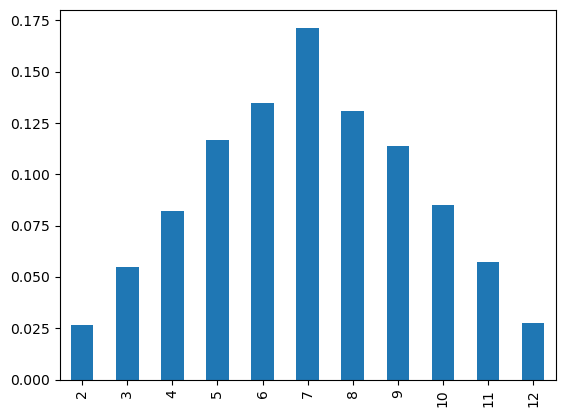

In [3]:

L=[]
for i in range(10000):
    a = random.randint(1,6)
    b = random.randint(1,6)
    L.append(a+b)
len(L)
print(L[:12])
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()
s
s.plot(kind='bar')

In [5]:
import numpy as np

np.cumsum(s)

2     0.0266
3     0.0815
4     0.1634
5     0.2800
6     0.4145
7     0.5860
8     0.7166
9     0.8305
10    0.9155
11    0.9726
12    1.0000
Name: count, dtype: float64

<Axes: >

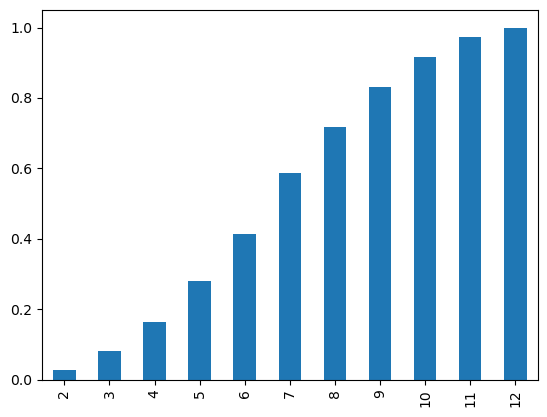

In [6]:
np.cumsum(s).plot(kind='bar')

PDF

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal

sample = normal(loc=50,scale=5,size=1000)


In [5]:
sample

array([46.7285816 , 57.0133489 , 48.94415608, 45.83226475, 51.24332881,
       52.35935275, 57.61657976, 43.65717192, 55.07360826, 45.1340658 ,
       52.23969337, 48.12053717, 46.73627771, 62.04214357, 59.76630378,
       45.65726169, 44.32818012, 45.42175442, 53.74140011, 41.05421689,
       43.3451459 , 63.33545962, 46.50064226, 57.29735857, 58.50938885,
       53.07477552, 50.27846525, 55.379707  , 48.7362029 , 47.24359635,
       49.4222262 , 54.59645143, 55.19701399, 49.79080674, 43.43193186,
       48.79824513, 51.69171846, 50.95069955, 54.7186834 , 46.54075208,
       55.15967798, 45.11561269, 59.88835032, 55.09118151, 51.63582636,
       43.93945842, 46.70987228, 51.42175969, 58.2783164 , 55.32725378,
       54.06597295, 48.28654648, 48.54593378, 44.88806112, 54.1495691 ,
       55.32969729, 62.57451295, 58.81118039, 47.66268459, 60.17752759,
       52.88318585, 53.90162151, 47.66295686, 48.37966311, 46.79840947,
       52.45507672, 45.26136763, 54.96393066, 46.6255852 , 59.60

In [6]:
sample.mean()

np.float64(50.25882697736239)

(array([  6.,  20.,  47., 158., 254., 241., 173.,  69.,  25.,   7.]),
 array([33.6526606 , 36.91213134, 40.17160207, 43.43107281, 46.69054354,
        49.95001428, 53.20948501, 56.46895575, 59.72842648, 62.98789722,
        66.24736795]),
 <BarContainer object of 10 artists>)

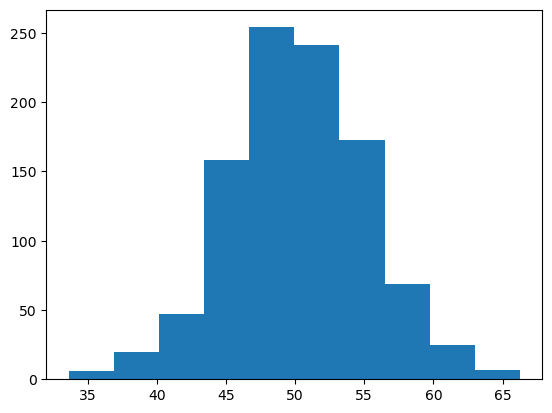

In [7]:
plt.hist(sample,bins=10)

In [8]:
sample_mean = sample.mean()
sample_std = sample.std()

In [9]:
import scipy
from scipy.stats import norm
dist = norm(sample_mean,sample_std)


In [10]:
values = np.linspace(sample.min(),sample.max(),100)


In [11]:
probabilities = [dist.pdf(value) for value in values]


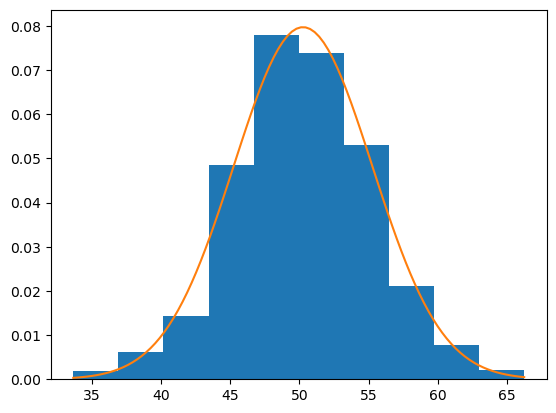

In [12]:
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)


KDE

In [13]:
sample1 = normal(loc=20,scale=5,size=300)
sample2 = normal(loc=40 ,scale=5 ,size=700)
sample = np.hstack((sample1,sample2))

(array([ 4.,  1.,  2.,  3.,  2.,  2.,  4., 12.,  6., 18., 17., 21., 29.,
        26., 20., 21., 23., 18., 19., 18.,  8.,  8., 12.,  6., 11., 16.,
        27., 24., 32., 35., 51., 44., 62., 56., 40., 68., 41., 52., 44.,
        30., 15., 21., 14.,  4.,  6.,  3.,  0.,  2.,  1.,  1.]),
 array([ 5.69945981,  6.7087344 ,  7.718009  ,  8.7272836 ,  9.73655819,
        10.74583279, 11.75510739, 12.76438198, 13.77365658, 14.78293118,
        15.79220577, 16.80148037, 17.81075497, 18.82002956, 19.82930416,
        20.83857876, 21.84785335, 22.85712795, 23.86640255, 24.87567714,
        25.88495174, 26.89422634, 27.90350094, 28.91277553, 29.92205013,
        30.93132473, 31.94059932, 32.94987392, 33.95914852, 34.96842311,
        35.97769771, 36.98697231, 37.9962469 , 39.0055215 , 40.0147961 ,
        41.02407069, 42.03334529, 43.04261989, 44.05189448, 45.06116908,
        46.07044368, 47.07971827, 48.08899287, 49.09826747, 50.10754206,
        51.11681666, 52.12609126, 53.13536586, 54.14464045,

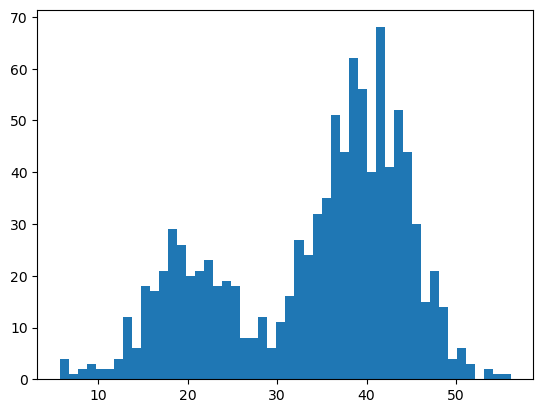

In [14]:
plt.hist(sample,bins=50)

In [15]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth = 3,kernel = 'gaussian')

sample = sample.reshape((len(sample),1))
model.fit(sample)

,bandwidth,3
,algorithm,'auto'
,kernel,'gaussian'
,metric,'euclidean'
,atol,0
,rtol,0
,breadth_first,True
,leaf_size,40
,metric_params,None


In [16]:
values = np.linspace(sample.min(),sample.max(),1000)
values = values.reshape((len(sample),1))


In [17]:
probabilities = model.score_samples(values) #ye exponential krna pdd rha h cz score sample give value in log , so exp se normalize ho jati h
probabilities = np.exp(probabilities)               


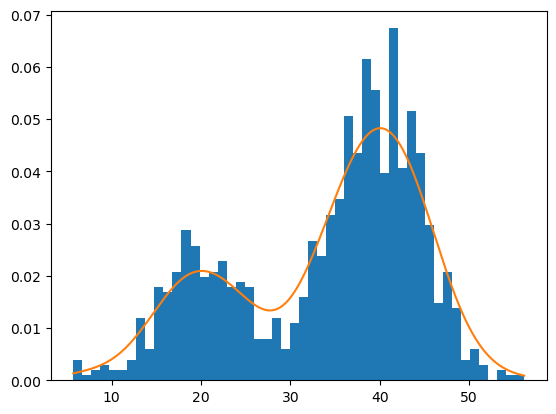

In [18]:
plt.hist(sample,bins=50,density = True)
plt.plot(values,probabilities)

USE OF PDF AND CDF IN DATA SCIENCE 


In [19]:
import seaborn as sns




In [20]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

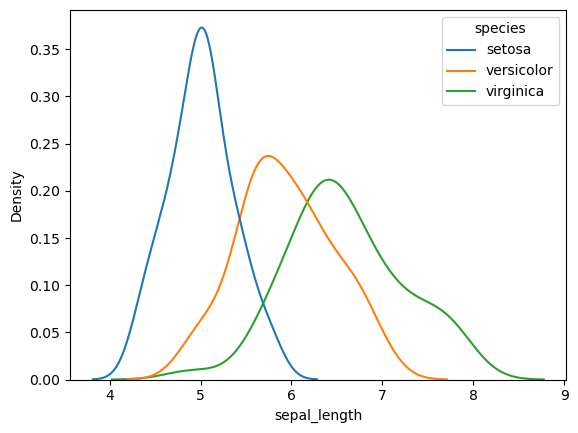

In [21]:
sns.kdeplot(data=df,x='sepal_length',hue='species')
#in this petal_length and petal_width is capable to differentiate between these three type so sepla data we can remove

<Axes: xlabel='sepal_width', ylabel='Density'>

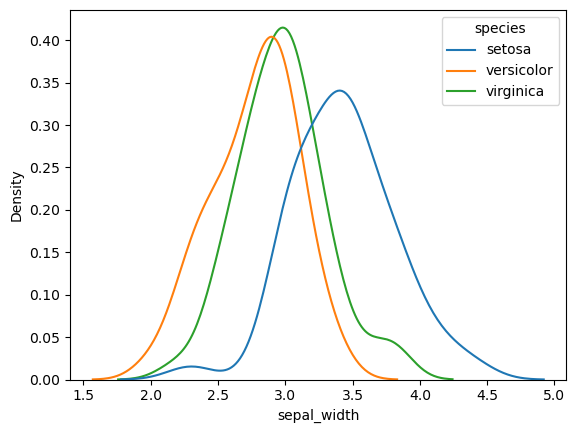

In [22]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

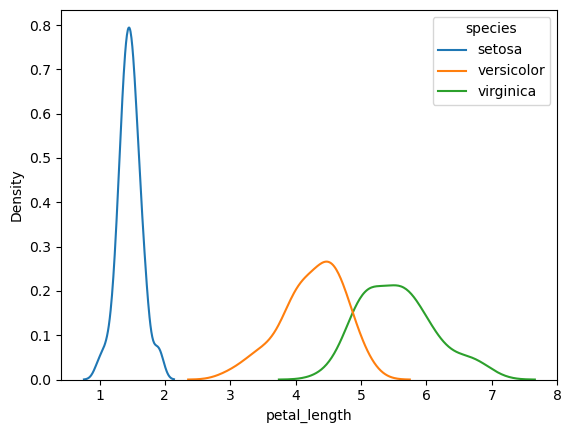

In [23]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

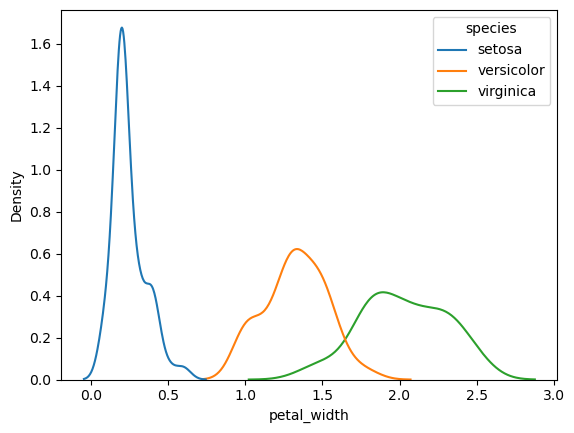

In [24]:
sns.kdeplot(data=df,x='petal_width',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

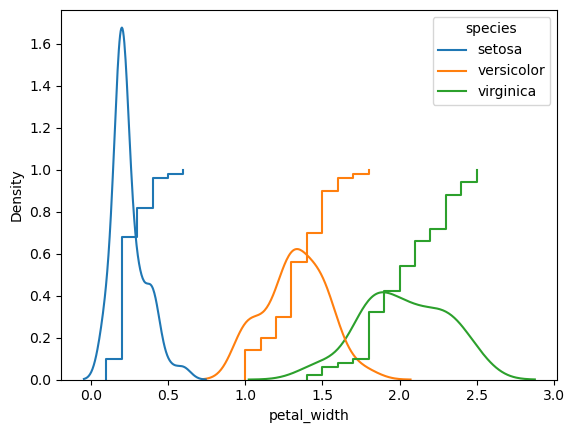

In [22]:
sns.kdeplot(data=df,x='petal_width',hue='species')
sns.ecdfplot(data=df,x='petal_width',hue='species')

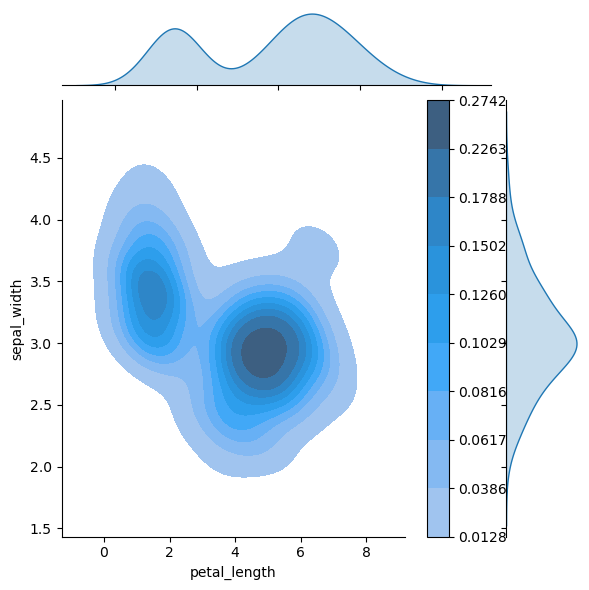

In [25]:
sns.jointplot(data=df,x='petal_length',y='sepal_width',kind='kde',fill=True,cbar=True)     # 2D density plot

In [26]:
df = sns.load_dataset('iris')

<Axes: xlabel='sepal_length', ylabel='Density'>

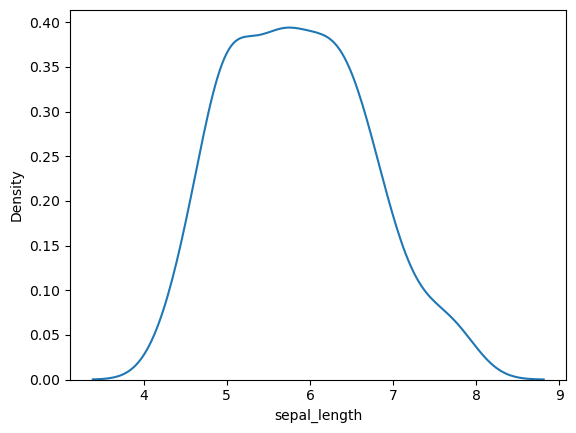

In [27]:
sns.kdeplot(df['sepal_length'])

In [28]:
temp = sorted(df['sepal_length'].tolist())

In [29]:
y_quant = []

for i in range(1,101):
    y_quant.append(np.percentile(temp,i))

In [30]:
samples = np.random.normal(loc=0,scale=1,size=1000)


In [31]:
x_quant = []

for i in range(1,101):
    x_quant.append(np.percentile(samples,i))

In [32]:
samples = np.random.normal(loc=0,scale=1,size=1000)

<Axes: >

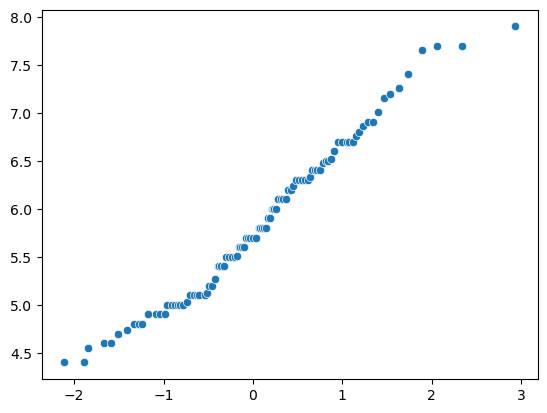

In [33]:
sns.scatterplot(x=x_quant,y=y_quant)

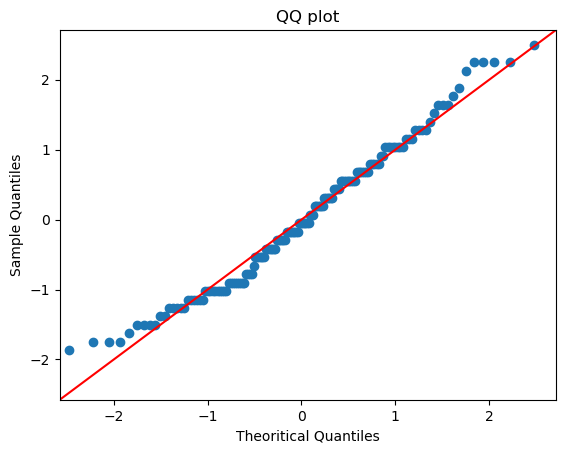

In [34]:
#  Shortcut of the upper graph using statsmodels library

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Create QQ plot of two dataset
fig = sm.qqplot(df['sepal_length'],line='45',fit = True)

#Add a title and labelto te QQ plot
plt.title('QQ plot')
plt.xlabel('Theoritical Quantiles')
plt.ylabel('Sample Quantiles')

#Show the graph
plt.show()

(array([101., 112.,  93., 103.,  96.,  96., 106., 105.,  91.,  97.]),
 array([0.00290007, 0.10240629, 0.20191251, 0.30141873, 0.40092495,
        0.50043117, 0.59993739, 0.69944361, 0.79894982, 0.89845604,
        0.99796226]),
 <BarContainer object of 10 artists>)

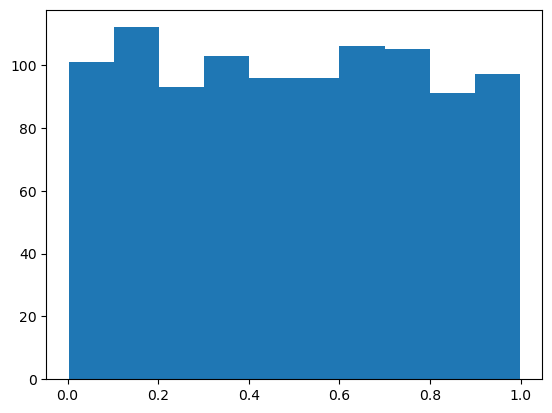

In [35]:
x = np.random.uniform(low=0,high=1,size=1000)
plt.hist(x)

In [36]:
# Fit a uniform distribution to the data
import scipy.stats as stats
params = stats.uniform.fit(x)
dist = stats.uniform(loc = params[0],scale = params[1])


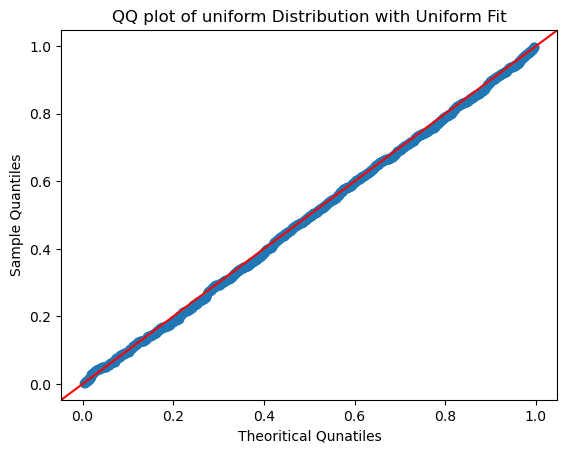

In [37]:
#Create a QQ plot of teh data using uniform distribution
fig = sm.qqplot(x,dist = dist , line='45')

#Add a title and label to the plot
plt.title('QQ plot of uniform Distribution with Uniform Fit')
plt.xlabel('Theoritical Qunatiles')
plt.ylabel('Sample Quantiles')

#Show the plot 
plt.show()

LOG - LOG PLOT 

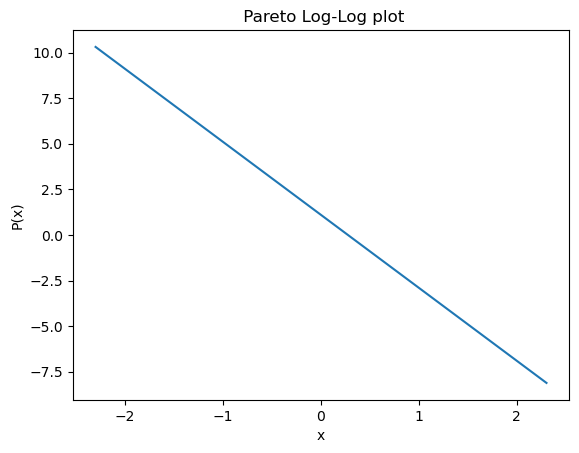

In [38]:
import numpy as np 
import matplotlib.pyplot as plt
 
#Define the parameter of the pareto distribution
alpha = 3
xm =1

#Create an array of x value
x = np.linspace(0.1,10,1000)

#Create the y value of this 
y = ((alpha* (xm)**alpha)/(x**(alpha+1)))

#create the log-log plot
plt.plot(np.log(x),np.log(y))

#add label and the title 
plt.title(' Pareto Log-Log plot')
plt.xlabel('x')
plt.ylabel('P(x)')

#show thw graph
plt.show()
 

(array([897.,  77.,  14.,   5.,   5.,   0.,   1.,   0.,   0.,   1.]),
 array([ 1.00021712,  2.0675994 ,  3.13498167,  4.20236395,  5.26974622,
         6.3371285 ,  7.40451078,  8.47189305,  9.53927533, 10.60665761,
        11.67403988]),
 <BarContainer object of 10 artists>)

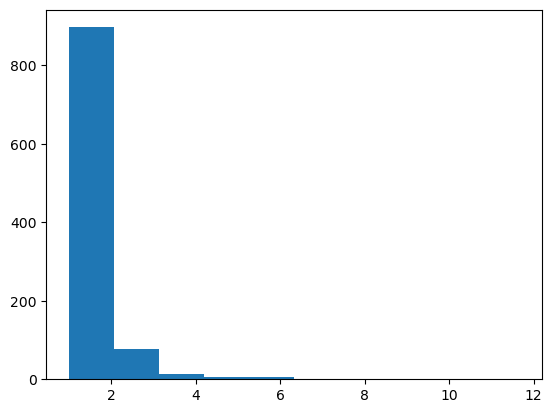

In [39]:
import scipy.stats as stats
import statsmodels.api as sm 
import numpy as np 
import matplotlib.pyplot as plt

#Define the parameter of pareto distribution
alpha =3 
xm=1

#Generate a set of random pareto distribution
x = stats.pareto.rvs(b =alpha,scale =xm ,size=1000)
plt.hist(x)



In [40]:
#fit a pareto distribution to the data
params = stats.pareto.fit(x,floc = 0)

#create a pareto distribution object with fitted parameters
dist = stats.pareto(b = params[0],scale = params[2])


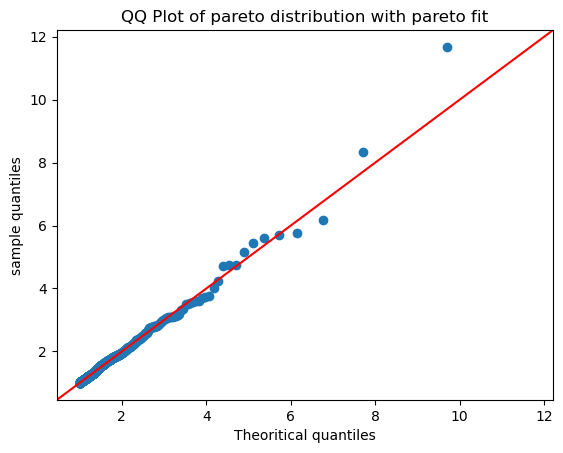

In [41]:
#create the qq plot of the data using pareto distsribution
fig = sm.qqplot(x , dist = dist ,line ='45')

#Add a title aand labels to the plot 
plt.title('QQ Plot of pareto distribution with pareto fit')
plt.xlabel('Theoritical quantiles')
plt.ylabel('sample quantiles')

#show the graph
plt.show()

 Yoe - Johnson Transformation

In [42]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [45]:
df  = pd.read_csv('concrete_data.csv')

In [46]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [47]:
df.shape
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [48]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [49]:
X = df.drop(columns =['Strength'])
y = df.iloc[:,-1]

In [54]:
X_train,X_test , y_train , y_test= train_test_split(X,y,test_size=0.2,random_state=42)


In [56]:
#Applying Regresion without any transformation
lr = LinearRegression()

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.6275531792314851

In [58]:
#cross chcking with cross value score (10 output ki average ka mean niklta h ->better and fix result)
lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

np.float64(0.46099404916628667)

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\806439004.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


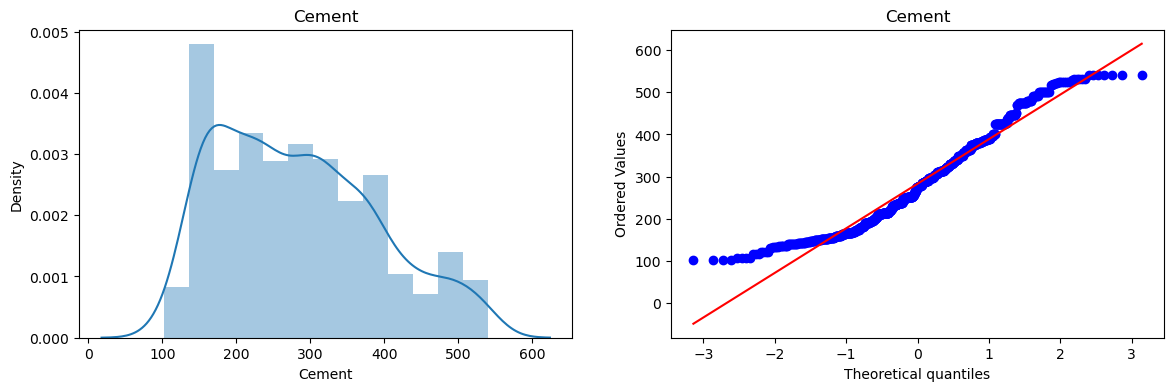

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\806439004.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


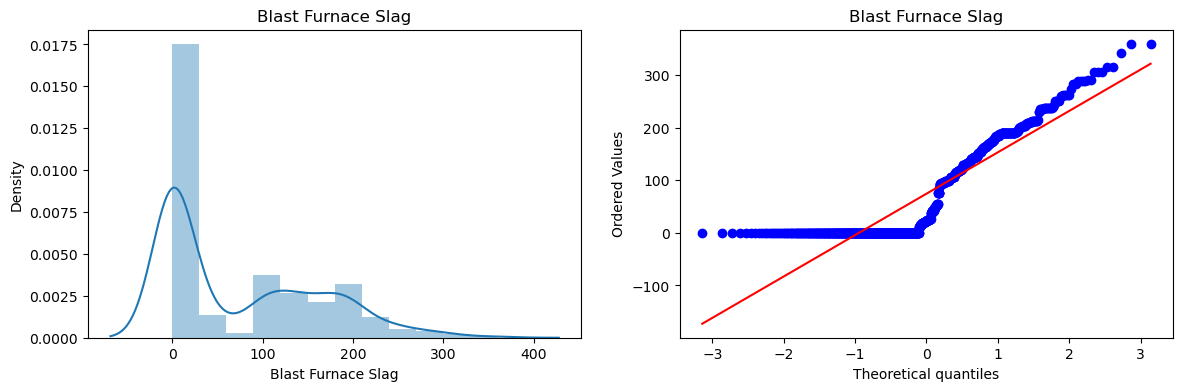

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\806439004.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


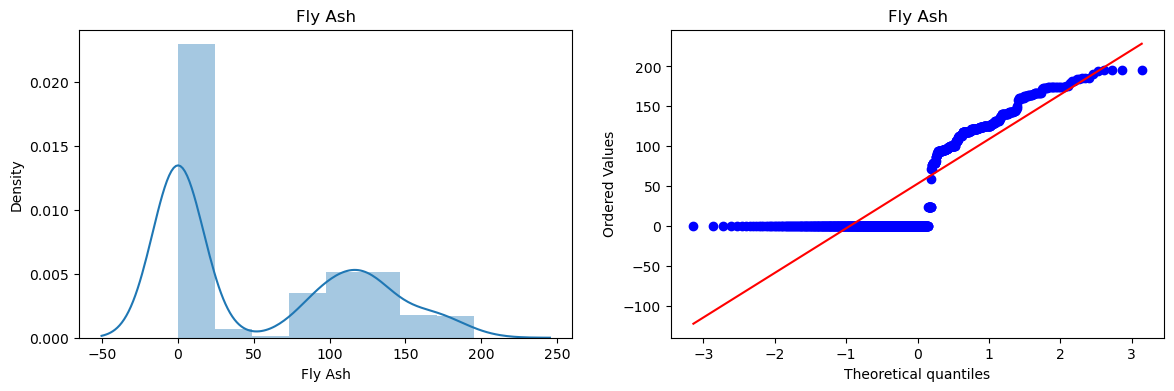

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\806439004.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


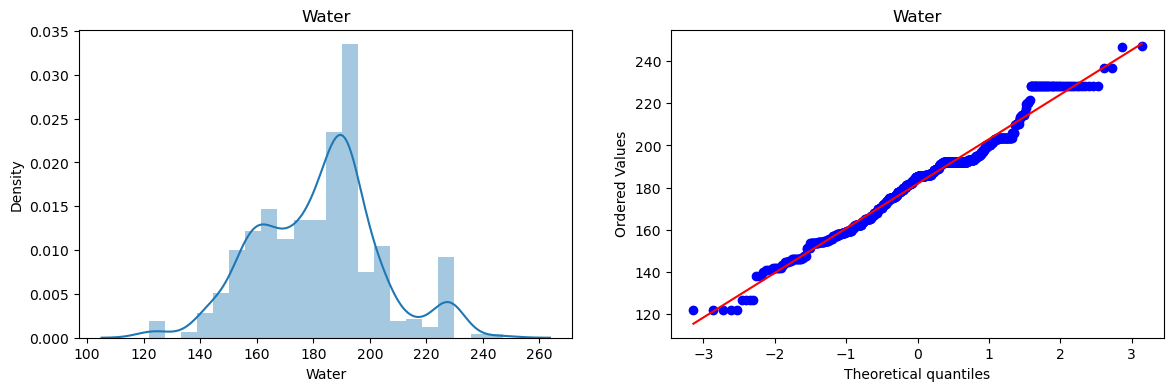

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\806439004.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


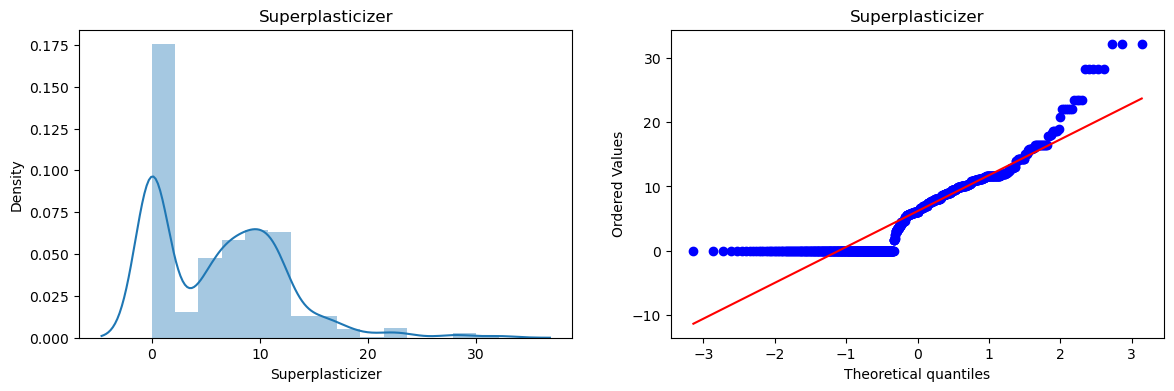

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\806439004.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


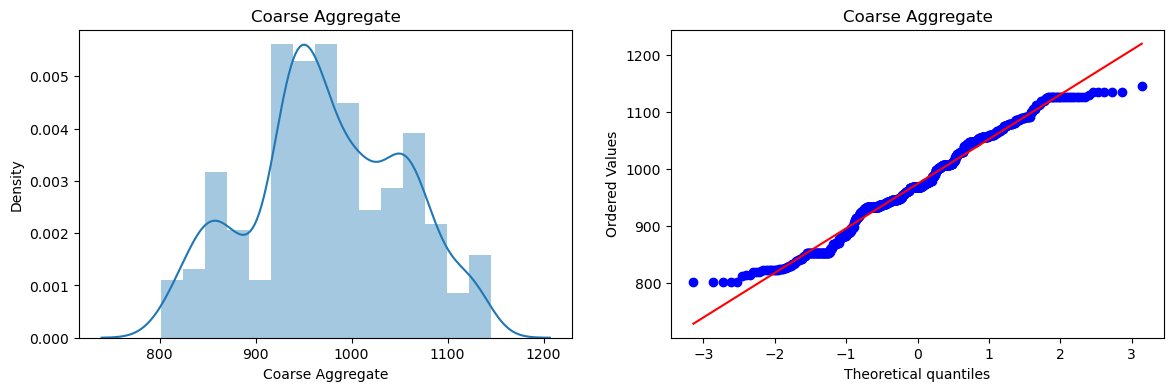

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\806439004.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


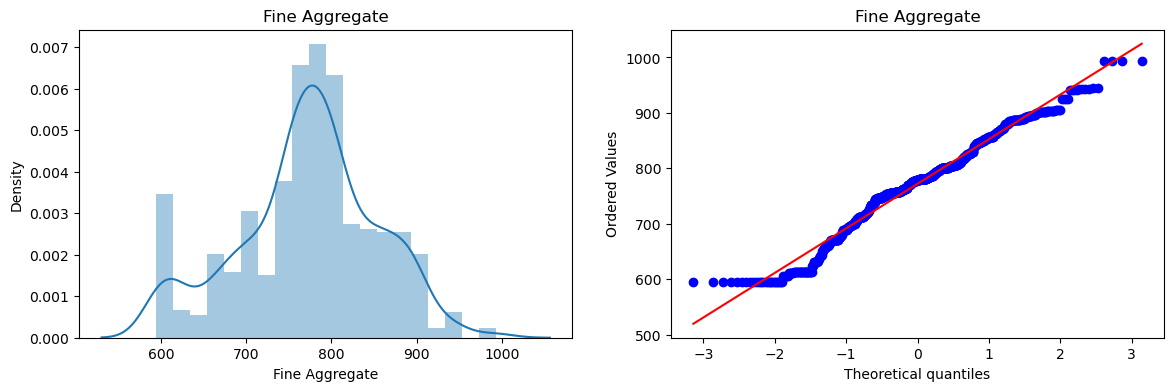

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\806439004.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


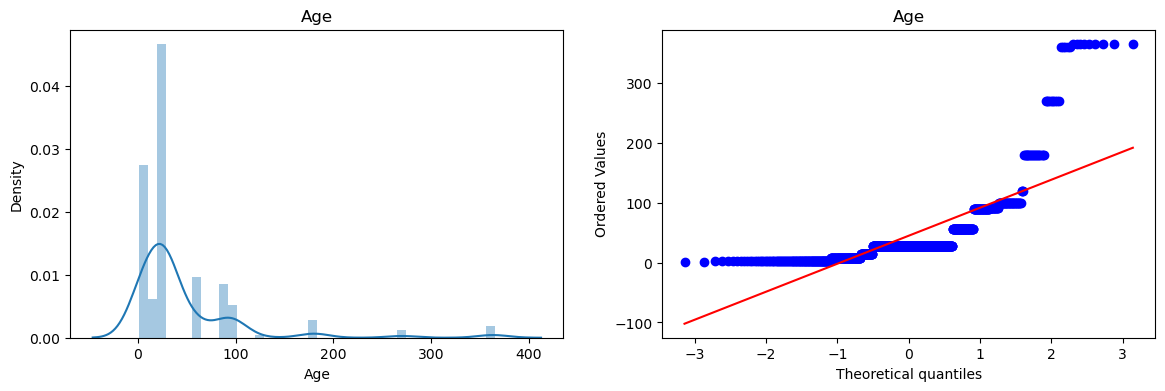

In [60]:
#plot displot without any transformations
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_train[col],dist="norm",plot =plt)
    plt.title(col)
    
    plt.show()

In [61]:
#applyinng box cox transformation

pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train+0.00001)
X_test_transformed = pt.transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.027842
2,Fly Ash,-0.044554
3,Water,0.772681
4,Superplasticizer,0.113892
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066630


In [67]:
#applying LinearRegression on transformed data
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)
r2_score(y_test,y_pred2)

0.7987283120373966

In [70]:
pt = PowerTransformer(method='box-cox')
X_transformed=pt.fit_transform(X+0.00001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

np.float64(0.6668489663987442)

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\4269442719.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\dell\AppData\Local\Temp\ipykernel_9252\4269442719.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


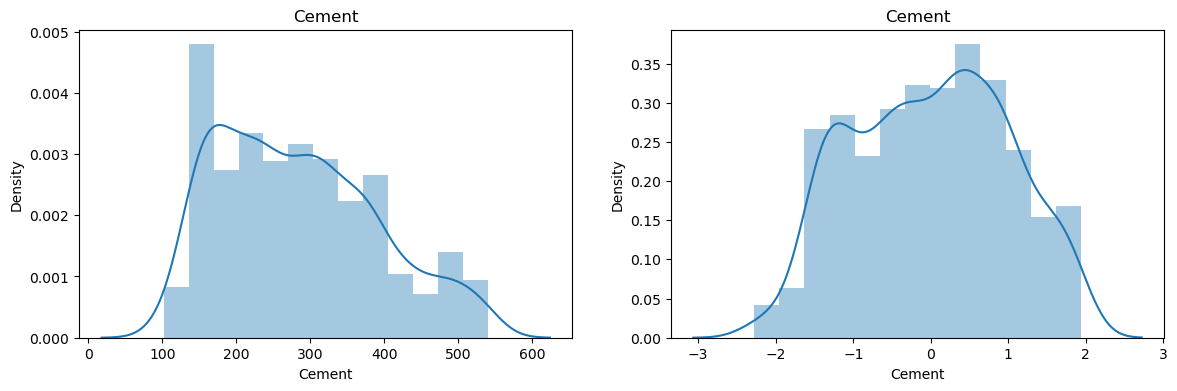

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\4269442719.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\dell\AppData\Local\Temp\ipykernel_9252\4269442719.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


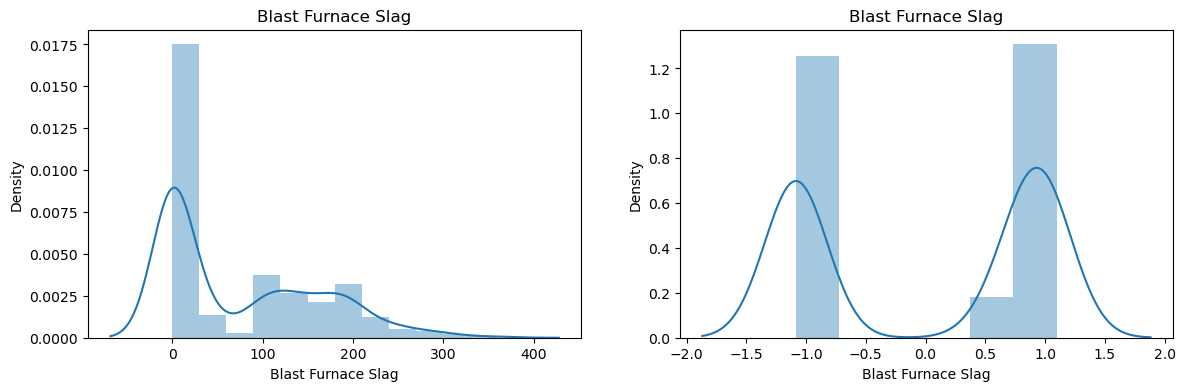

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\4269442719.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\dell\AppData\Local\Temp\ipykernel_9252\4269442719.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


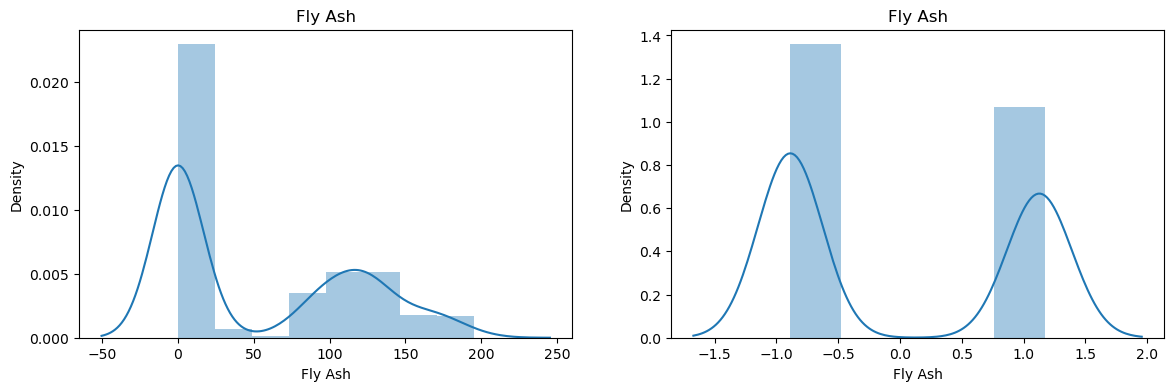

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\4269442719.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\dell\AppData\Local\Temp\ipykernel_9252\4269442719.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


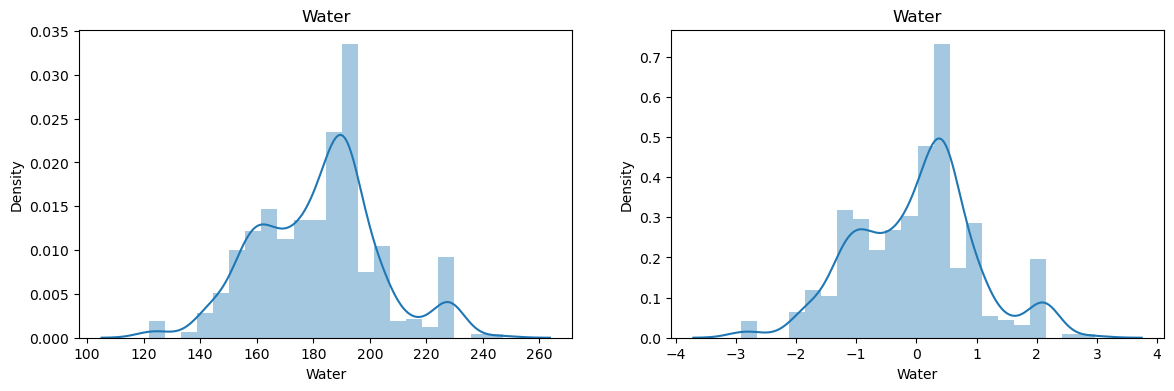

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\4269442719.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\dell\AppData\Local\Temp\ipykernel_9252\4269442719.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


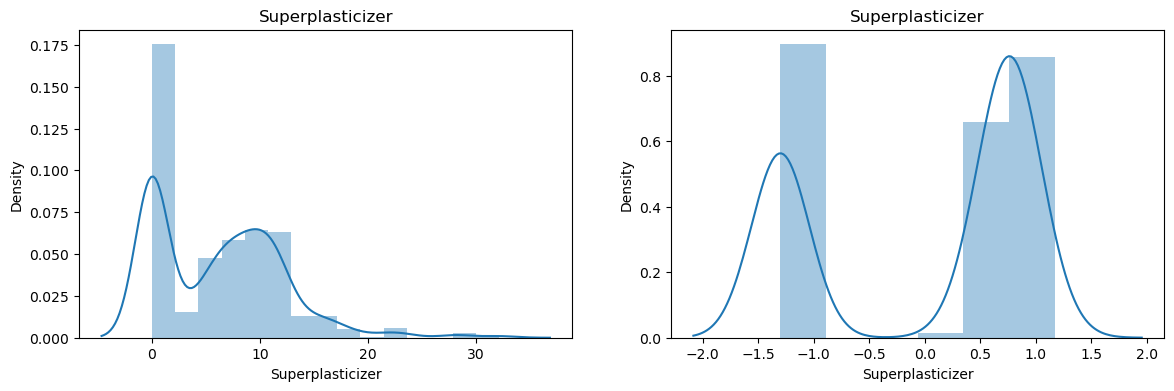

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\4269442719.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\dell\AppData\Local\Temp\ipykernel_9252\4269442719.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


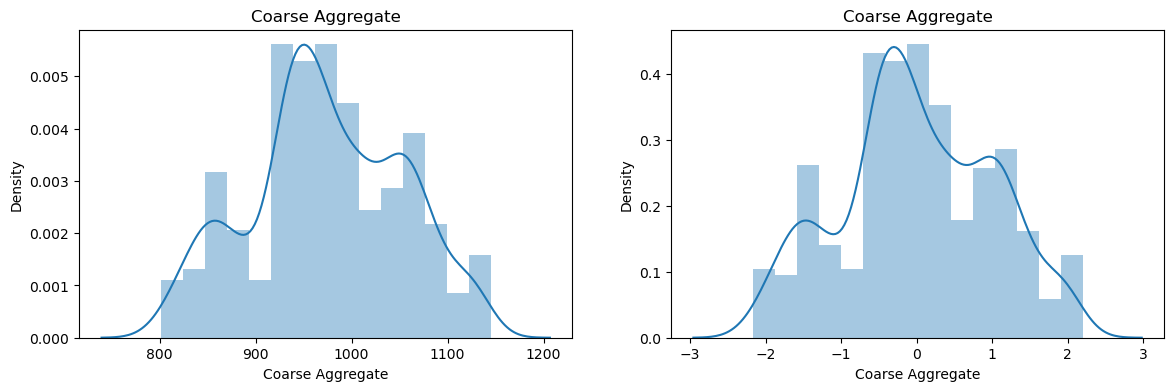

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\4269442719.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\dell\AppData\Local\Temp\ipykernel_9252\4269442719.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


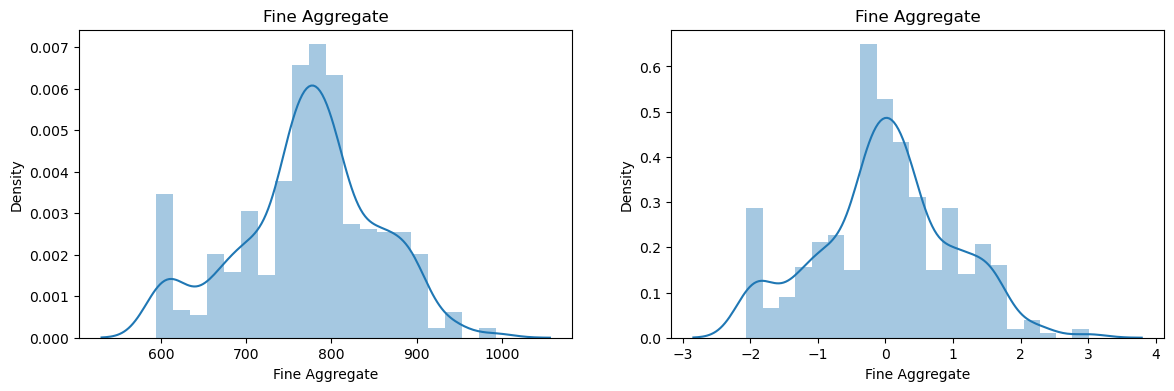

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\4269442719.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\dell\AppData\Local\Temp\ipykernel_9252\4269442719.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[col])


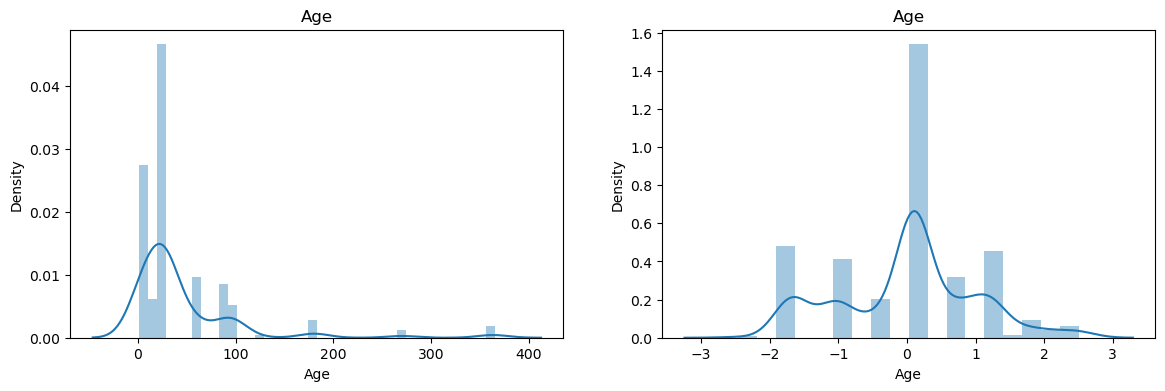

In [73]:
#Before and after comparision for Box-Cox Plot
X_train_transformed =pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)
    
    plt.show()

In [78]:
#Applying Yoe-Johnson transformation
pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8161906511066099


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [80]:
#cross value 
pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)
lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))
 

np.float64(0.6834625126992434)

In [82]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\1296296197.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\dell\AppData\Local\Temp\ipykernel_9252\1296296197.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


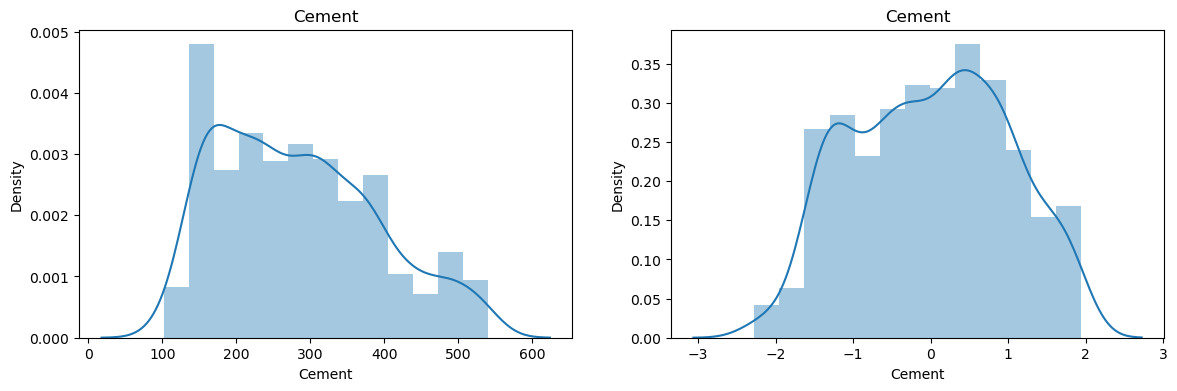

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\1296296197.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\dell\AppData\Local\Temp\ipykernel_9252\1296296197.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


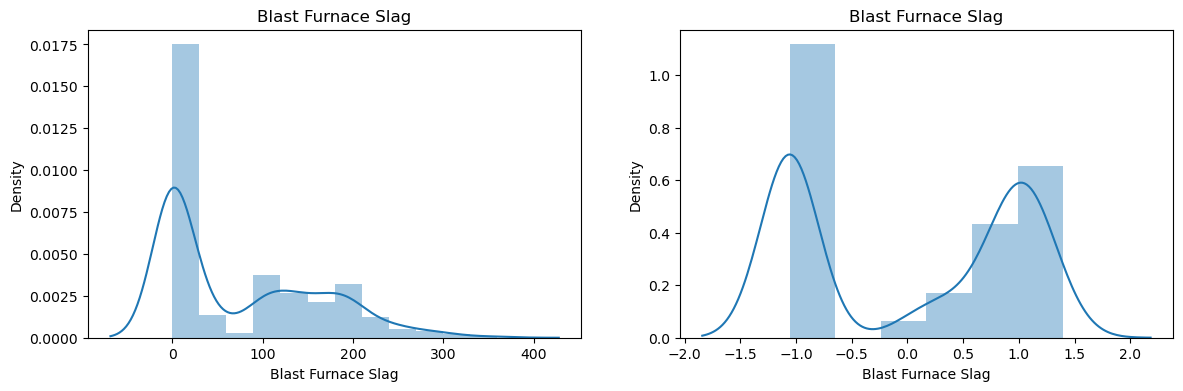

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\1296296197.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\dell\AppData\Local\Temp\ipykernel_9252\1296296197.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


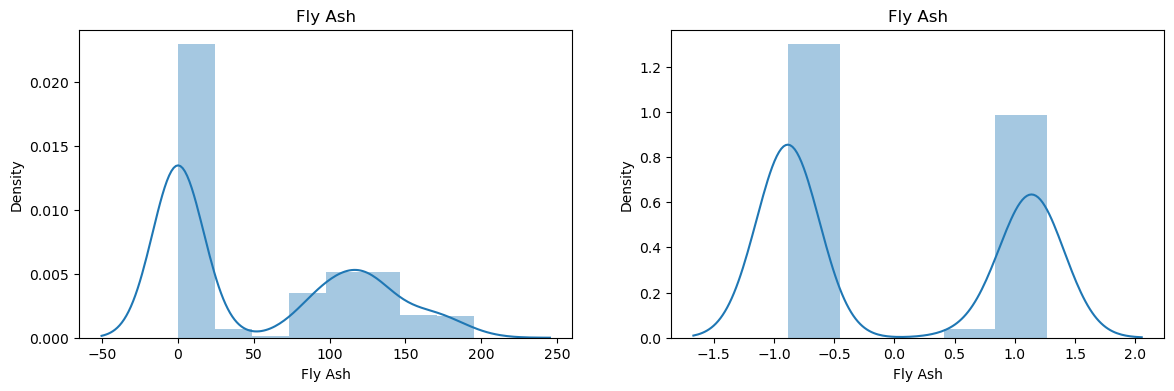

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\1296296197.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\dell\AppData\Local\Temp\ipykernel_9252\1296296197.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


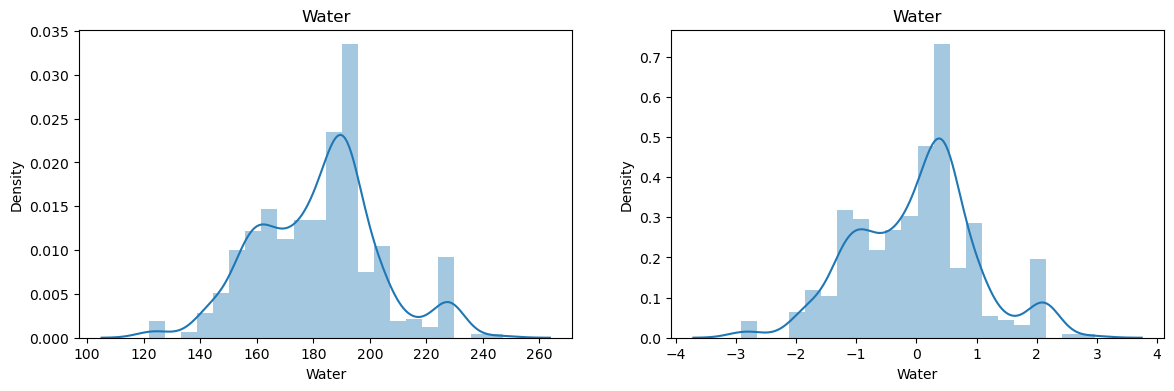

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\1296296197.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\dell\AppData\Local\Temp\ipykernel_9252\1296296197.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


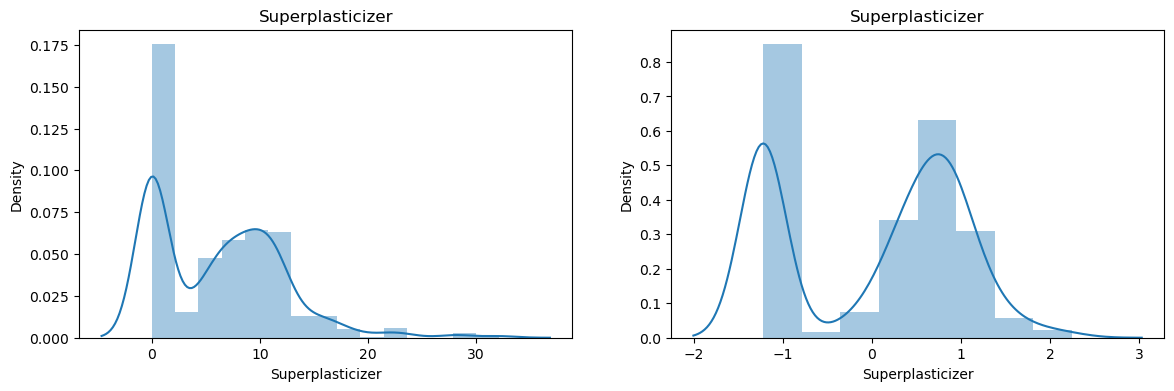

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\1296296197.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\dell\AppData\Local\Temp\ipykernel_9252\1296296197.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


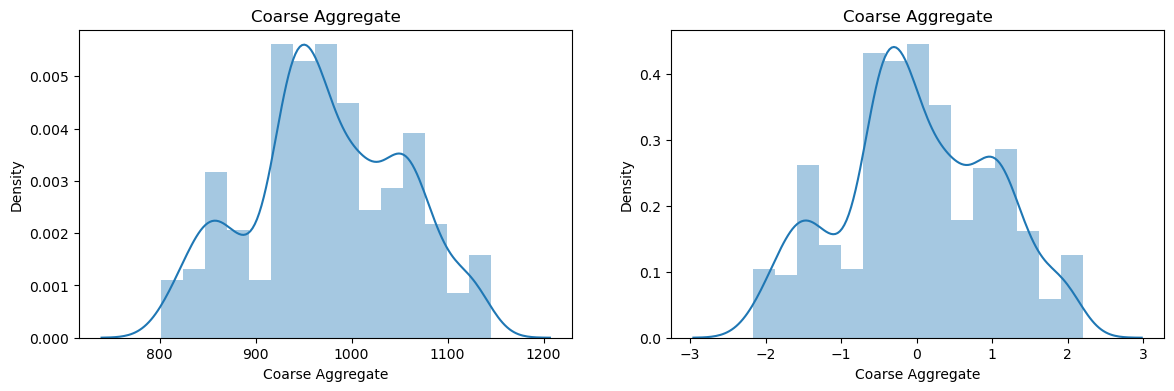

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\1296296197.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\dell\AppData\Local\Temp\ipykernel_9252\1296296197.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


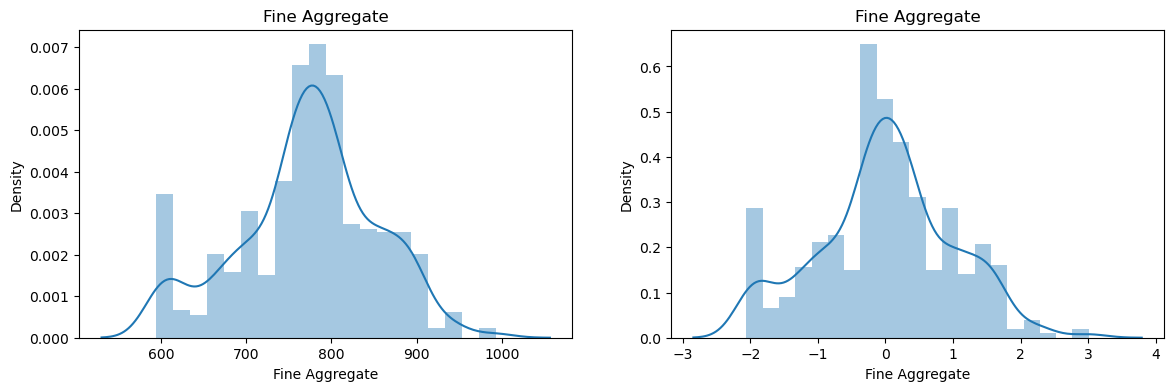

C:\Users\dell\AppData\Local\Temp\ipykernel_9252\1296296197.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])
C:\Users\dell\AppData\Local\Temp\ipykernel_9252\1296296197.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[col])


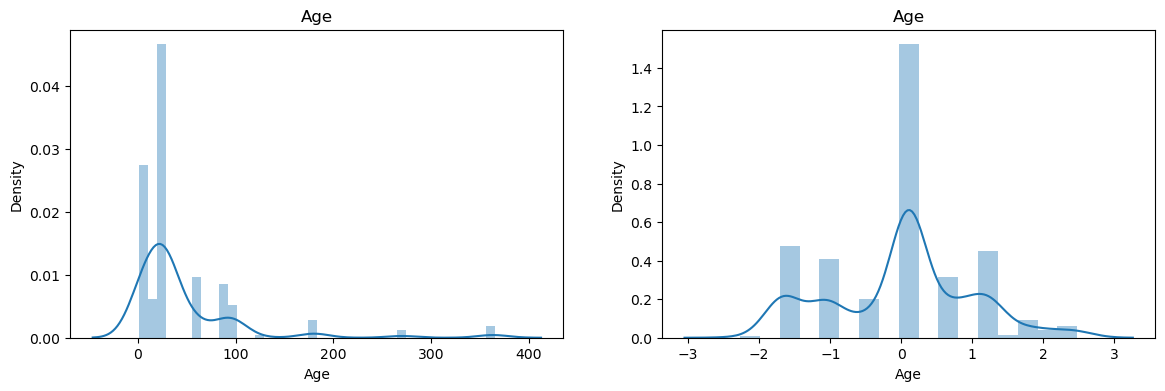

In [83]:
#Before and after comparision for yeo johnson

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)
    
    plt.subplot(122)
    sns.distplot(X_train_transformed2[col])
    plt.title(col)
    
    plt.show()

In [84]:
#Side by side lambdas
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.174348
1,Blast Furnace Slag,0.016633,0.015715
2,Fly Ash,-0.136480,-0.161447
3,Water,0.808438,0.771307
4,Superplasticizer,0.264160,0.253935
5,Coarse Aggregate,1.129395,1.130050
6,Fine Aggregate,1.830764,1.783100
7,Age,0.001771,0.019885
